# Simulating a Predator and Prey Relationship

Without a predator, rabbits will reproduce until they reach the carrying capacity of the land. When coyotes show up, they will eat the rabbits and reproduce until they can't find enough rabbits. We will explore the fluctuations in the two populations over time.

# Using Lotka-Volterra Model

## Part 1: Rabbits without predators

According to [Mother Earth News](https://www.motherearthnews.com/homesteading-and-livestock/rabbits-on-pasture-intensive-grazing-with-bunnies-zbcz1504), a rabbit eats six square feet of pasture per day. Let's assume that our rabbits live in a five acre clearing in a forest: 217,800 square feet/6 square feet = 36,300 rabbit-days worth of food. For simplicity, let's assume the grass grows back in two months. Thus, the carrying capacity of five acres is 36,300/60 = 605 rabbits.

Female rabbits reproduce about six to seven times per year. They have six to ten children in a litter.  According to [Wikipedia](https://en.wikipedia.org/wiki/Rabbit), a wild rabbit reaches sexual maturity when it is about six months old and typically lives one to two years. For simplicity, let's assume that in the presence of unlimited food, a rabbit lives forever, is immediately sexually mature, and has 1.5 children every month.

For our purposes, then, let $x_t$ be the number of rabbits in our five acre clearing on month $t$.
$$
\begin{equation*}
  R_t = R_{t-1} + 1.5\frac{605 - R_{t-1}}{605} R_{t-1}
\end{equation*}
$$

The formula could be put into general form
$$
\begin{equation*}
  R_t = R_{t-1} + growth_{R} \times \big( \frac{capacity_{R} - R_{t-1}}{capacity_{R}} \big) R_{t-1}
\end{equation*}
$$

By doing this, we allow users to interact with growth rate and the capacity value visualize different interaction 


In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline
style = {'description_width': 'initial'}
capacity_R = widgets.FloatText(description="Capacity", value=605)
growth_rate_R = widgets.FloatText(description="Growth rate", value=1.5)
initial_R = widgets.FloatText(description="Initial population",style=style, value=1)
button_R = widgets.Button(description="Plot Graph")
display(initial_R, capacity_R, growth_rate_R, button_R)

def plot_graph_r(b):
    print("helo")
    clear_output()
    display(initial_R, capacity_R, growth_rate_R, button_R)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = np.arange(0, 20, 1)
    s = np.zeros(t.shape)
    R = initial_R.value
    for i in range(t.shape[0]):
        s[i] = R
        R = R + growth_rate_R.value * (capacity_R.value - R)/(capacity_R.value) * R
        if R < 0.0:
            R = 0.0
        
    ax.plot(t, s)
    ax.set(xlabel='time (months)', ylabel='number of rabbits',
       title='Rabbits Without Predators')
    ax.grid()

button_R.on_click(plot_graph_r)

FloatText(value=1.0, description='Initial population', style=DescriptionStyle(description_width='initial'))

FloatText(value=605.0, description='Capacity')

FloatText(value=1.5, description='Growth rate')

Button(description='Plot Graph', style=ButtonStyle())

## Tweaking the Growth Function
The growth is regulated by this part of the formula:
$$
\begin{equation*}
  \frac{capacity_{R} - R_{t-1}}{capacity_{R}}
\end{equation*}
$$
That is, this fraction (and thus growth) goes to zero when the land is at capacity. As the number of rabbits goes to zero, this fraction goes to 1.0, so growth is at its highest speed.  We could substitute in another function that has the same values at zero and at capacity, but has a different shape. For example, 
$$
\begin{equation*}
  \left( \frac{capacity_{R} - R_{t-1}}{capacity_{R}} \right)^{\beta}
\end{equation*}
$$
where $\beta$ is a positive number. For example, if $\beta$ is 1.3, it indicates that the rabbits can sense that food supplies are dwindling and pre-emptively slow their reproduction.

FloatText(value=1.0, description='Initial population', style=DescriptionStyle(description_width='initial'))

FloatText(value=605.0, description='Capacity')

FloatText(value=1.5, description='Growth rate')

FloatText(value=0.2, description='Shaping')

Button(description='Plot Graph', style=ButtonStyle())

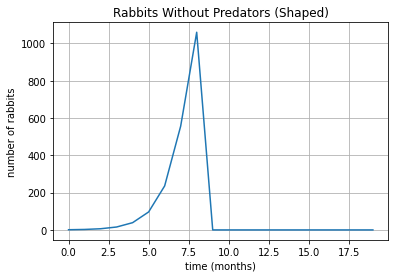

In [4]:
%matplotlib inline
import math
style = {'description_width': 'initial'}
capacity_R = widgets.FloatText(description="Capacity", value=605)
growth_rate_R = widgets.FloatText(description="Growth rate", value=1.5)
initial_R = widgets.FloatText(description="Initial population",style=style, value=1)
shaping_R = widgets.FloatText(description="Shaping", value=1.3)
button_R = widgets.Button(description="Plot Graph")
display(initial_R, capacity_R, growth_rate_R, shaping_R, button_R)

def plot_graph_r(b):
    clear_output()
    display(initial_R, capacity_R, growth_rate_R, shaping_R, button_R)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = np.arange(0, 20, 1)
    s = np.zeros(t.shape)
    R = initial_R.value
    beta = float(shaping_R.value)
    for i in range(t.shape[0]):
        s[i] = R
        reserve_ratio = (capacity_R.value - R)/capacity_R.value
        if reserve_ratio > 0.0:
            R = R + R * growth_rate_R.value * reserve_ratio**beta
        else:
            R = R - R * growth_rate_R.value * (-1.0 * reserve_ratio)**beta
        if R < 0.0:
            R = 0
        
    ax.plot(t, s)
    ax.set(xlabel='time (months)', ylabel='number of rabbits',
       title='Rabbits Without Predators (Shaped)')
    ax.grid()

button_R.on_click(plot_graph_r)

## Part 2: Coyotes without Prey
According to [Huntwise](https://www.besthuntingtimes.com/blog/2020/2/3/why-you-should-coyote-hunt-how-to-get-started), coyotes need to consume about 2-3 pounds of food per day. Their diet is 90 percent mammalian. The perfect adult cottontail rabbits weigh 2.6 pounds on average. Thus, we assume the coyote eats one rabbit per day. 

For coyotes, the breeding season is in February and March. According to [Wikipedia](https://en.wikipedia.org/wiki/Coyote#Social_and_reproductive_behaviors), females have a gestation period of 63 days, with an average litter size of 6, though the number fluctuates depending on coyote population density and the abundance of food. By fall, the pups are old enough to hunt for themselves.

In the absence of rabbits, the number of coyotes will drop, as their food supply is scarce.
The formula could be put into general form:

$$
\begin{align*}
  C_t & \sim (1 - death_{C}) \times C_{t-1}\\
  &= C_{t-1} - death_{C} \times C_{t-1}
\end{align*}
$$



In [ ]:
%matplotlib inline
style = {'description_width': 'initial'}
initial_C=widgets.FloatText(description="Initial Population",style=style,value=200.0)
declining_rate_C=widgets.FloatText(description="Death rate",value=0.5)
button_C=widgets.Button(description="Plot Graph")
display(initial_C, declining_rate_C, button_C)

def plot_graph_c(b):
    clear_output()
    display(initial_C, declining_rate_C, button_C)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t1 = np.arange(0, 20, 1)
    s1 = np.zeros(t1.shape)
    C = initial_C.value
    for i in range(t1.shape[0]):
        s1[i] = C
        C = (1 - declining_rate_C.value)*C
        
    ax.plot(t1, s1)
    ax.set(xlabel='time (months)', ylabel='number of coyotes',
       title='Coyotes Without Prey')
    ax.grid()

button_C.on_click(plot_graph_c)


## Part 3: Interaction Between Coyotes and Rabbit
With the simple interaction from the first two parts, now we can combine both interaction and come out with simple interaction.
$$
\begin{align*}
  R_t &= R_{t-1} + growth_{R} \times \big( \frac{capacity_{R} - R_{t-1}}{capacity_{R}} \big) R_{t-1} - death_{R}(C_{t-1})\times R_{t-1}\\\\
  C_t &= C_{t-1} - death_{C} \times C_{t-1} + growth_{C}(R_{t-1}) \times C_{t-1}
\end{align*}
$$

In equations above, death rate of rabbit is a function parameterized by the amount of coyote. Similarly, the growth rate of coyotes is a function parameterized by the amount of the rabbit.

The death rate of the rabbit should be $0$ if there are no coyotes, while it should approach $1$ if there are many coyotes. One of the formula fulfilling this characteristics is hyperbolic function.

$$
\begin{equation}
death_R(C) = 1 - \frac{1}{xC + 1}
\end{equation}
$$

where $x$ determines how quickly $death_R$ increases as the number of coyotes ($C$) increases. Similarly, the growth rate of the coyotes should be $0$ if there are no rabbits, while it should approach infinity if there are many rabbits. One of the formula fulfilling this characteristics is a linear function.

$$
\begin{equation}
growth_C(R) = yC
\end{equation}
$$

where $y$ determines how quickly $growth_C$ increases as number of rabbit ($R$) increases.

Putting all together, the final equtions are

$$
\begin{align*}
  R_t &= R_{t-1} + growth_{R} \times \big( \frac{capacity_{R} - R_{t-1}}{capacity_{R}} \big) R_{t-1} - \big( 1 - \frac{1}{xC_{t-1} + 1} \big)\times R_{t-1}\\\\
  C_t &= C_{t-1} - death_{C} \times C_{t-1} + yR_{t-1}C_{t-1}
\end{align*}
$$



In [ ]:
%matplotlib inline
initial_rabbit = widgets.FloatText(description="Initial Rabbit",style=style, value=1)
initial_coyote = widgets.FloatText(description="Initial Coyote",style=style, value=1)
capacity = widgets.FloatText(description="Capacity rabbits", style=style,value=5)
growth_rate = widgets.FloatText(description="Growth rate rabbits", style=style,value=1)
death_rate = widgets.FloatText(description="Death rate coyotes", style=style,value=1)
x = widgets.FloatText(description="Death rate ratio due to coyote",style=style, value=1)
y = widgets.FloatText(description="Growth rate ratio due to rabbit",style=style, value=1)
button = widgets.Button(description="Plot Graph")
display(initial_rabbit, initial_coyote, capacity, growth_rate, death_rate, x, y, button)
def plot_graph(b):
    clear_output()
    display(initial_rabbit, initial_coyote, capacity, growth_rate, death_rate, x, y, button)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = np.arange(0, 20, 0.5)
    s = np.zeros(t.shape)
    p = np.zeros(t.shape)
    R = initial_rabbit.value
    C = initial_coyote.value
    for i in range(t.shape[0]):
        s[i] = R
        p[i] = C
        R = R + growth_rate.value * (capacity.value - R)/(capacity.value) * R - (1 - 1/(x.value*C + 1))*R
        C = C - death_rate.value * C  + y.value*s[i]*C
        
    ax.plot(t, s, label="rabit")
    ax.plot(t, p, label="coyote")
    ax.set(xlabel='time (months)', ylabel='population size',
       title='Coyotes-Rabbit (Predator-Prey) Relationship')
    ax.grid()
    ax.legend()

button.on_click(plot_graph)

### Trajectories and Direction Fields for a system of equations 

To further demonstrate the predator numbers rise and fall cyclically with their preferred prey, we will be using the Lotka-Volterra equations, which is based on differential equations. The Lotka-Volterra Prey-Predator model involves two equations, one describes the changes in number of preys and the second one decribes the changes in number of predators. The dynamics of the interaction between a rabbit population $R_t$ and a coyotes $C_t$ is described by the following differential equations:
$$
\begin{align*}
\frac{dR}{dt} = aR_t - bR_tC_t
\end{align*}
$$

$$
\begin{align*}
\frac{dC}{dt} = bdR_tC_t - cC_t
\end{align*}
$$

with the following notations:

x: number of preys(rabbits)\
y: number of predators(coyotes)\
a: natural growing rate of rabbits, when there is no coyotes\
b: natural dying rate of rabbits, which is killed by coyotes per unit of time\
c: natural dying rate of coyotes, when ther is not rabbits\
d: natural growing rate of coyotes with which consumed prey is converted to predator

We start from defining the system of ordinary differential equations, and then find the equilibrium points for our system. Equilibrium occurs when the frowth rate is 0, and we can see that we have two equilibrium points in our example, the first one happens when theres no preys or predators, which represents the extinction of both species, the second equilibrium happens when $x=\frac{c}{b d}$ $y=\frac{a}{b}$. Move on, we will use the scipy to help us integrate the differential equations, and generate the plot of evolution for both species:


In [ ]:
from scipy import integrate

#using the same input number from the previous example
a = 1
b = 1
c = 1
d = 1
# Define the system of ODEs
# P[0] is prey, P[1] is predator
def dP_dt(P,t=0):
    return np.array([a*P[0]-b*P[0]*P[1], d*b*P[0]*P[1]-c*P[1]])
# Define the Equilibrium points
eq1 = np.array([0. , 0.])
eq2 = np.array([c/(d*b),a/b])

In [ ]:
values = np.linspace(0.1, 3, 10)
# Colors for each trajectory
vcolors = plt.cm.autumn_r(np.linspace(0.1, 1., len(values)))
f = plt.figure(figsize=(10,6))
t = np.linspace(0, 150, 1000)
for v, col in zip(values, vcolors):
    # Starting point 
    P0 = v*eq2
    P = integrate.odeint(dP_dt, P0, t)
    plt.plot(P[:,0], P[:,1],
             lw= 1.5*v, # Different line width for different trajectories
             color=col, label='P0=(%.f, %.f)' % ( P0[0], P0[1]) )
ymax = plt.ylim(bottom=0)[1]
xmax = plt.xlim(left=0)[1]
nb_points   = 20
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
X1,Y1  = np.meshgrid(x, y)                       
DX1, DY1 = dP_dt([X1, Y1])                      
M = (np.hypot(DX1, DY1))                           
M[M == 0] = 1.                                
DX1 /= M                                      
DY1 /= M
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of coyotes')
plt.legend()
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()




## Multiple Predators and Preys Relationship

The previous relationship could be extended to multiple predators and preys relationship

In [ ]:
%matplotlib inline
initial_rabbit2 = widgets.FloatText(description="Initial Rabbit", style=style,value=2)
initial_coyote2 = widgets.FloatText(description="Initial Coyote",style=style, value=2)
initial_deer2 = widgets.FloatText(description="Initial Deer", style=style,value=1)
initial_wolf2 = widgets.FloatText(description="Initial Wolf", style=style,value=1)
population_capacity = widgets.FloatText(description="capacity",style=style, value=10)
population_capacity_rabbit = widgets.FloatText(description="capacity rabbit",style=style, value=3)
growth_rate_rabbit = widgets.FloatText(description="growth rate rabbit",style=style, value=1)
death_rate_coyote = widgets.FloatText(description="death rate coyote",style=style, value=1)
growth_rate_deer = widgets.FloatText(description="growth rate deer",style=style, value=1)
death_rate_wolf = widgets.FloatText(description="death rate wolf",style=style, value=1)
x1 = widgets.FloatText(description="death rate ratio due to coyote",style=style, value=1)
y1 = widgets.FloatText(description="growth rate ratio due to rabbit", style=style,value=1)
x2 = widgets.FloatText(description="death rate ratio due to wolf",style=style, value=1)
y2 = widgets.FloatText(description="growth rate ratio due to deer", style=style,value=1)
plot2 = widgets.Button(description="Plot Graph")
display(initial_rabbit2, initial_coyote2,initial_deer2, initial_wolf2, population_capacity, 
        population_capacity_rabbit, growth_rate_rabbit, growth_rate_deer, death_rate_coyote,death_rate_wolf,
        x1, y1,x2, y2, plot2)
def plot_graph(b):
    clear_output()
    display(initial_rabbit2, initial_coyote2,initial_deer2, initial_wolf2, population_capacity, 
        population_capacity_rabbit, growth_rate_rabbit, growth_rate_deer, death_rate_coyote,death_rate_wolf,
        x1, y1,x2, y2, plot2)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t_m = np.arange(0, 20, 0.5)
    r_m = np.zeros(t_m.shape)
    c_m = np.zeros(t_m.shape)
    d_m = np.zeros(t_m.shape)
    w_m = np.zeros(t_m.shape)
    R_m = initial_rabbit2.value
    C_m = initial_coyote2.value
    D_m = initial_deer2.value
    W_m = initial_wolf2.value
    population_capacity_deer = population_capacity.value - population_capacity_rabbit.value
    for i in range(t_m.shape[0]):
        r_m[i] = R_m
        c_m[i] = C_m
        d_m[i] = D_m
        w_m[i] = W_m
        
        R_m = R_m + growth_rate_rabbit.value * (population_capacity_rabbit.value - R_m)\
            /(population_capacity_rabbit.value) * R_m - (1 - 1/(x1.value*C_m + 1))*R_m - (1 - 1/(x2.value*W_m + 1))*R_m 
        D_m = D_m + growth_rate_deer.value * (population_capacity_deer - D_m) \
            /(population_capacity_deer) * D_m - (1 - 1/(x1.value*C_m + 1))*D_m - (1 - 1/(x2.value*W_m + 1))*D_m
        
        C_m = C_m - death_rate_coyote.value * C_m  + y1.value*r_m[i]*C_m + y2.value*d_m[i]*C_m
        W_m = W_m - death_rate_wolf.value * W_m  + y1.value*r_m[i]*W_m + y2.value*d_m[i]*W_m
        
    ax.plot(t_m, r_m, label="rabit")
    ax.plot(t_m, c_m, label="coyote")
    ax.plot(t_m, d_m, label="deer")
    ax.plot(t_m, w_m, label="wolf")
    ax.set(xlabel='time (months)', ylabel='population',
       title='Multiple Predator Prey Relationship')
    ax.grid()
    ax.legend()

plot2.on_click(plot_graph)